In [6]:
# Class dependencies
import jax.numpy as np
from matplotlib import pyplot as plt
from jax.scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pickle


# Other analysis libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from model_jeddy import OrigamiNetwork
from sklearn.datasets import load_digits

In [7]:
def layer(D, n):
    scales = (D@n)/np.dot(n, n)
    mask = scales > 1
    projected = 2 * np.outer(scales, n)
    adjustment = 2*n - projected
    return D + mask[:,np.newaxis] * adjustment

In [8]:
fv1 = .5*np.array([1,1])
fv2 = np.array([-1,1])
fv3 = np.array([-.85,0])
size = 20

# make a meshgrid of x and y values
x1 = np.linspace(-2,2,size)
x2 = np.linspace(-2,2,size)
X1,X2 = np.meshgrid(x1,x2)

# reshape the meshgrid into a 2D array and concatenate them
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
pairs = np.concatenate((X1,X2),axis=1)
cut1 = layer(pairs, fv1)
cut2 = layer(cut1, fv2)
cut = layer(cut2, fv3)
Y = cut[:,1] > .6

In [9]:
# test = OrigamiNetwork(layers=5, max_iter=1000, learning_rate=0.01, optimizer="grad", reg=0)
# fold_history = test.fit(pairs, Y)
# out = test.forward_pass(pairs)
# print("Before handpicked folds")
# print(test.score())

  0%|                                                   | 0/300 [00:00<?, ?it/s]/Users/jeddybennett/Documents/FoldAndCutNetworks/model_jeddy.py:833: RuntimeWarning: overflow encountered in exp
  exponential = np.exp(cut)
/Users/jeddybennett/Documents/FoldAndCutNetworks/model_jeddy.py:834: RuntimeWarning: invalid value encountered in divide
  softmax = exponential / np.sum(exponential, axis=1, keepdims=True)
Epoch 300/300 - Train Acc: 0.0992 - Val Acc: 0.0799: 100%|█| 300/300 [00:25<00:0


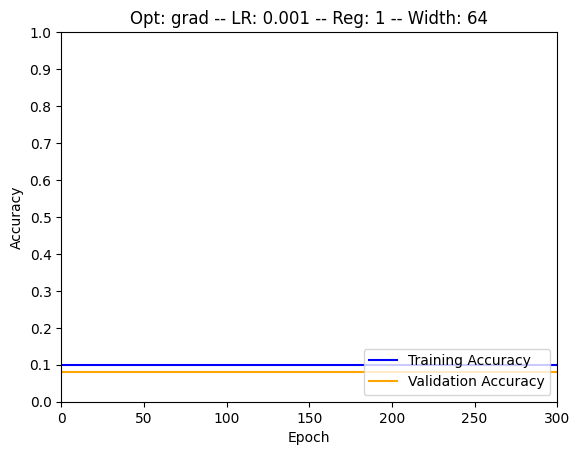

0.11388888888888889


In [10]:
# import small digits dataset

digits = load_digits()
X = digits.data
y = digits.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# set up the model
model = OrigamiNetwork(layers=2, epochs=300, optimizer='grad',learning_rate=0.001)
model.fit(X_train, y_train, X_val, y_val)

# get the predictions
y_hat = model.predict(X_test)
print(accuracy_score(y_test, y_hat))